In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados do arquivo CSV
df = pd.read_csv('insurance.csv')

In [3]:
# Exibindo as primeiras linhas do DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# Exibindo o shape do DataFrame (linhas e colunas)
print("DataFrame Shape:", df.shape)


DataFrame Shape: (1338, 7)


In [5]:
# Exibindo as informações gerais do DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
# Exibindo estatísticas descritivas do DataFrame
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
# Avaliando a distribuição por sexo
print("Distribuição por Sexo:")
print(df['sex'].value_counts())

Distribuição por Sexo:
sex
male      676
female    662
Name: count, dtype: int64


In [8]:
# Agrupando os dados para entender a casualidade por região
print("Casualidade por Região:")
print(df.groupby('region').size())

Casualidade por Região:
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


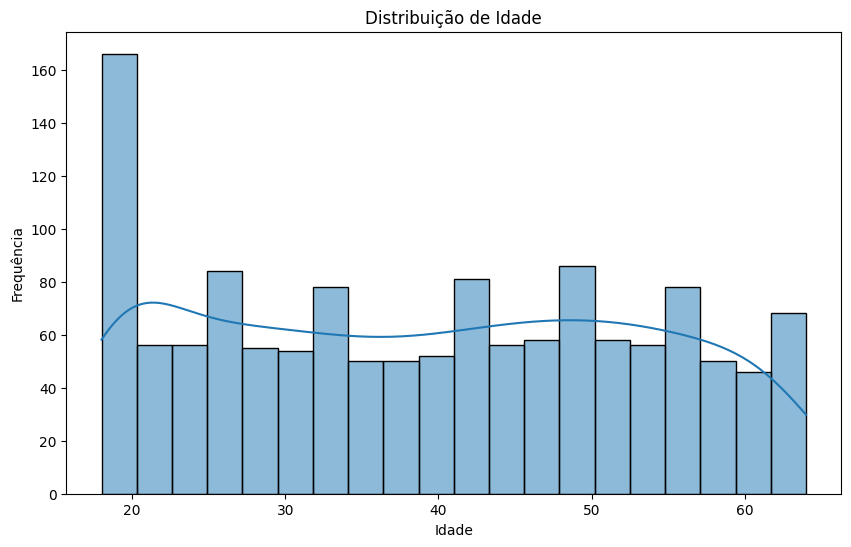

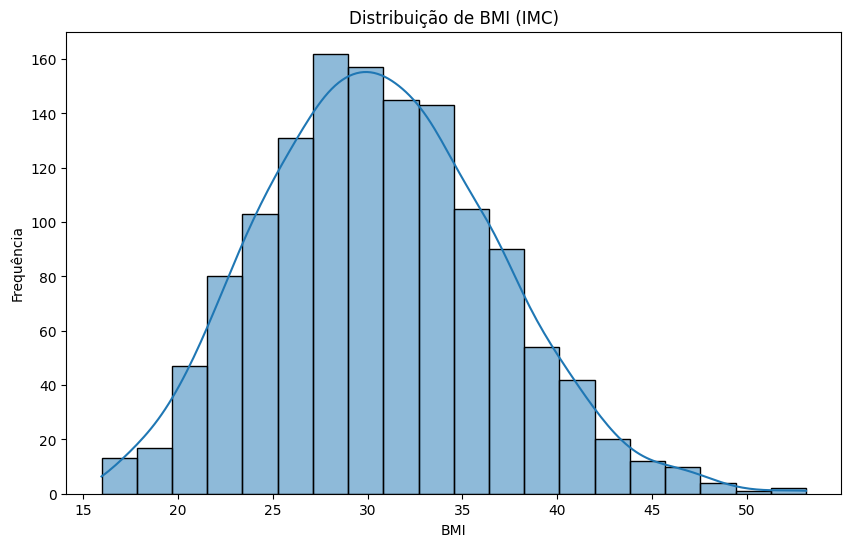

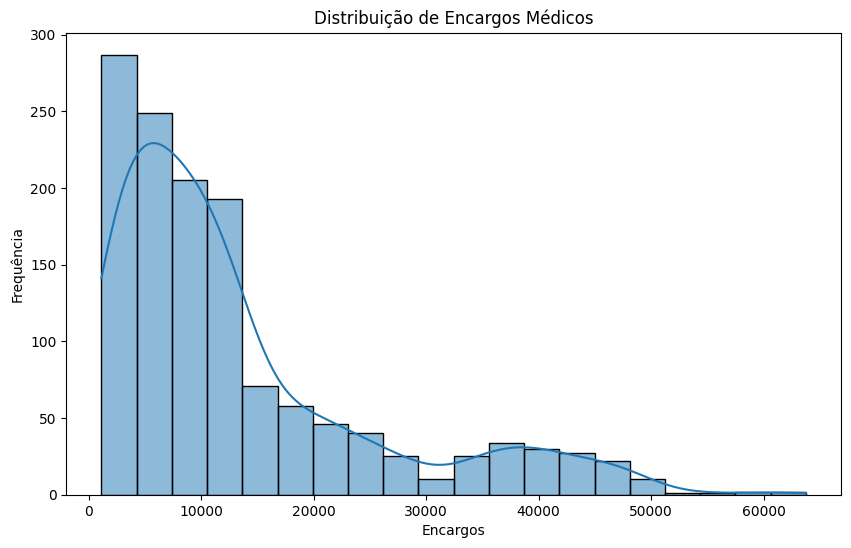

In [9]:
# Seção de visualização de gráficos de distribuição geral

# Plotando a distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Plotando a distribuição de BMI (IMC)
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('Distribuição de BMI (IMC)')
plt.xlabel('BMI')
plt.ylabel('Frequência')
plt.show()

# Plotando a distribuição de charges (encargos médicos)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Distribuição de Encargos Médicos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.show()


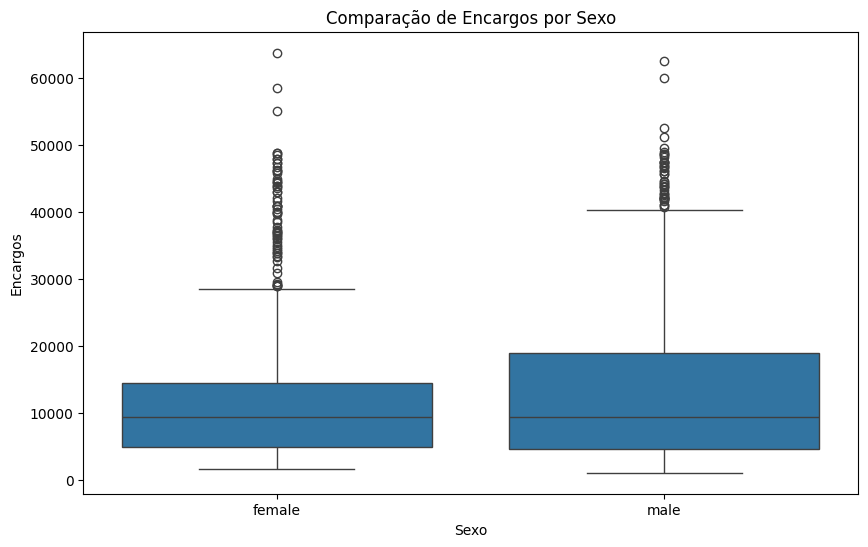

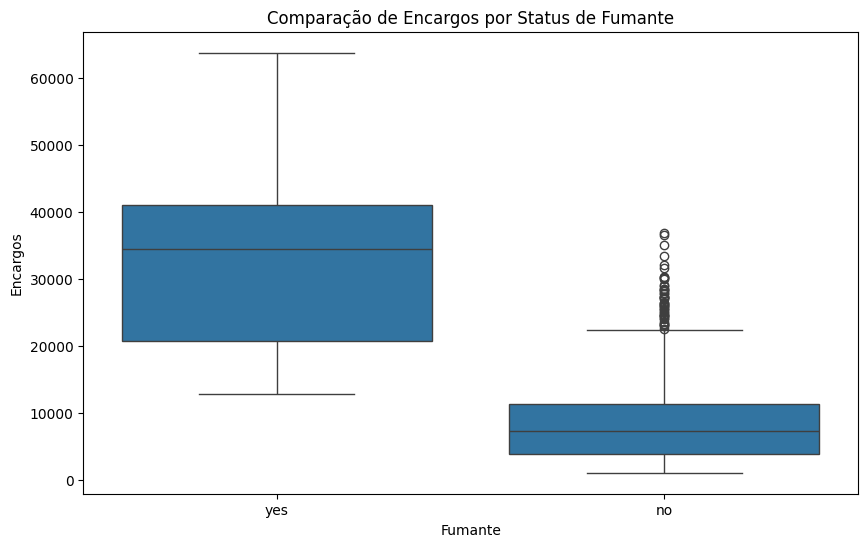

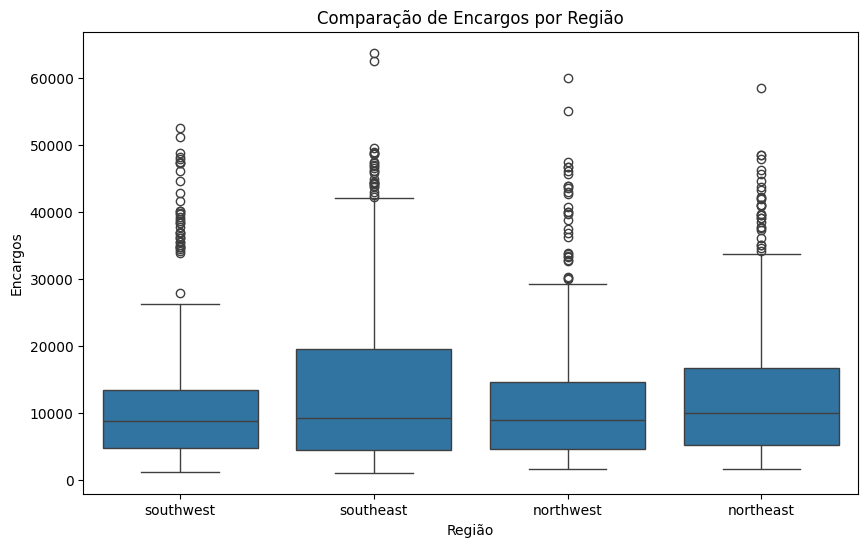

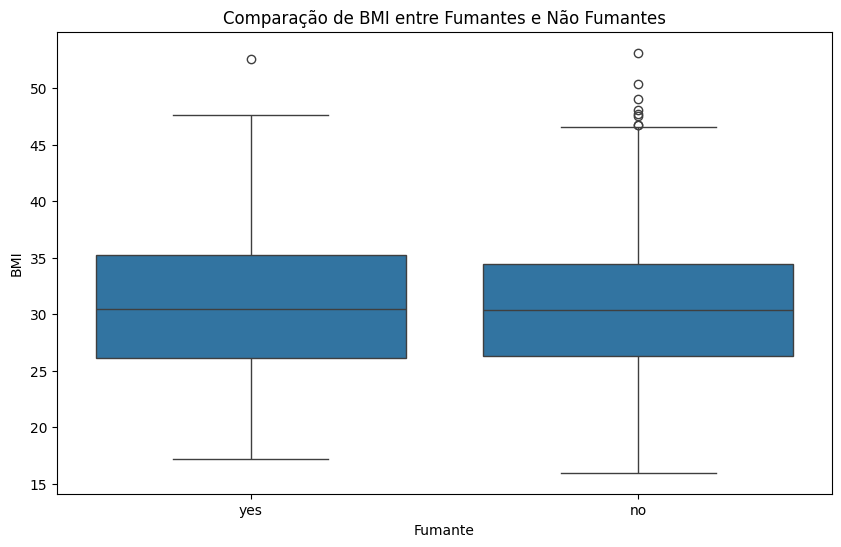

In [10]:
# Análises comparativas

# - Comparando Encargos x Sexo
# OBSERVAÇÕES
# 1 Encargos médicos medianos são semelhantes entre homens e mulheres.
# 2 Ambos os sexos têm outliers significativos (30.000 a 60.000), indicando indivíduos com custos bem acima da média.
# 3 A maioria dos encargos está entre 5.000 e 15.000 para ambos os sexos.
# 4 Outliers podem estar relacionados a fatores como fumar, IMC alto ou idade.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Comparação de Encargos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Encargos')
plt.show()

# Comparando encargos médicos x status de fumante
# OBSERVAÇÕES
# 1: A mediana de BMI (IMC) é bastante próxima entre fumantes e não fumantes, sugerindo que o status de fumante não impacta significativamente o valor central do BMI.
# 2: O intervalo interquartil dos fumantes é ligeiramente maior, indicando maior variabilidade no BMI entre fumantes em comparação com não fumantes.
# 3: Há alguns outliers no grupo de não fumantes, com valores de BMI acima de 40, enquanto o grupo de fumantes apresenta apenas um outlier mais extremo.
# 4: Ambas as distribuições de BMI apresentam uma faixa semelhante, o que sugere que o status de fumante, por si só, não está associado a um aumento significativo de BMI.
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Comparação de Encargos por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Encargos')
plt.show()

# Comparando encargos médicos por região
# OBSERVAÇÕES
# 1: As medianas dos encargos médicos são próximas entre as regiões, indicando que a localização geográfica por si só pode não ter grande influência no valor central dos custos médicos.
# 2: A região sudeste (southeast) apresenta uma maior variabilidade nos encargos médicos, com valores bem mais altos no limite superior e mais outliers acima de 50.000. Isso pode indicar que nessa região há mais pessoas com encargos elevados, possivelmente devido a uma combinação de fatores adicionais (como maior incidência de fumantes ou IMC mais alto).
# 3: Todas as regiões têm outliers, especialmente entre 30.000 e 60.000, sugerindo que há indivíduos com altos encargos em todas as áreas, mas mais concentrados no sudeste.
# 4: Apesar da maior variabilidade no sudeste, as distribuições de encargos nas outras regiões são relativamente consistentes, com a maioria dos encargos entre 5.000 e 20.000.
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Comparação de Encargos por Região')
plt.xlabel('Região')
plt.ylabel('Encargos')
plt.show()

# Comparando BMI entre fumantes e não fumantes
# OBSERVAÇÕES
# 1: A mediana de BMI é praticamente a mesma entre fumantes e não fumantes, sugerindo que o hábito de fumar não influencia o valor central do BMI.
# 2: O grupo de fumantes mostra uma distribuição ligeiramente mais ampla, com alguns valores mais altos, indicando uma leve maior variabilidade no BMI entre fumantes.
# 3: Os não fumantes têm alguns outliers de BMI acima de 40, o que pode indicar casos isolados de alto índice de massa corporal entre eles.
# 4: Apesar das pequenas diferenças, ambos os grupos têm uma faixa de BMI bastante parecida, sugerindo que o status de fumante, por si só, não tem grande impacto na distribuição do BMI.
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='bmi', data=df)
plt.title('Comparação de BMI entre Fumantes e Não Fumantes')
plt.xlabel('Fumante')
plt.ylabel('BMI')
plt.show()

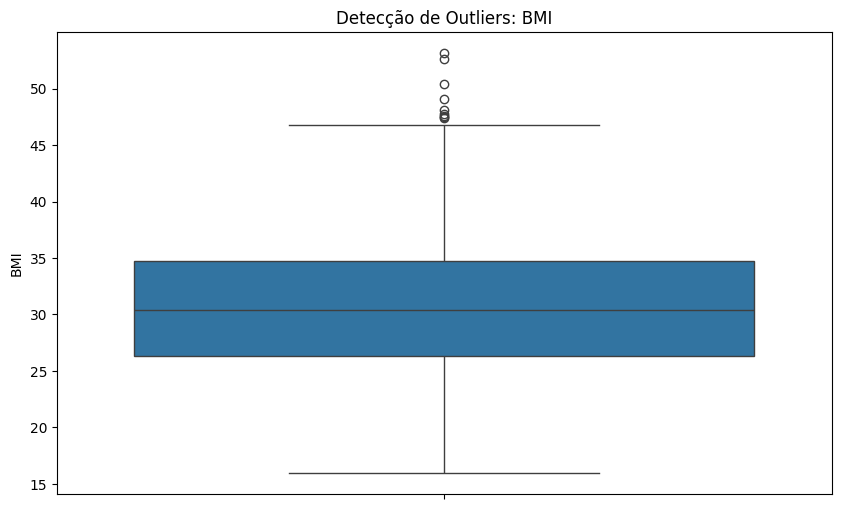

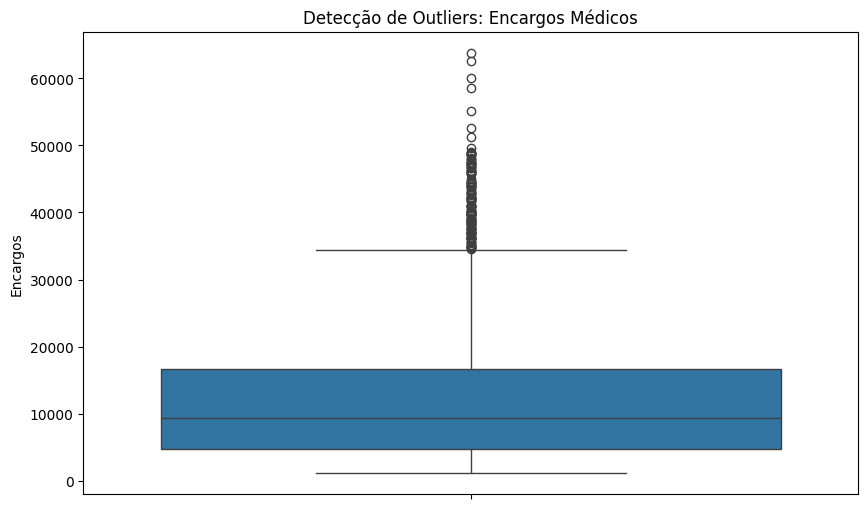

In [11]:
# Gráficos de outliers

# Usando boxplot para detectar outliers no BMI
# OBSERVAÇÕES
#1: A mediana do BMI está próxima de 30, indicando um valor central consistente para a amostra.
#2: Existem alguns outliers com BMI acima de 40, sugerindo a presença de indivíduos com índices elevados de massa corporal. Esses valores podem indicar obesidade ou condições de saúde que impactam o BMI.
#3: A maioria dos dados está concentrada entre aproximadamente 25 e 35, mostrando que a maior parte dos indivíduos tem um BMI dentro de uma faixa próxima ao peso normal ou sobrepeso.
#4: A caixa e os limites (bigodes) indicam uma distribuição relativamente simétrica, com a maioria dos valores em torno da mediana, sem uma grande assimetria.
plt.figure(figsize=(10, 6))
sns.boxplot(y='bmi', data=df)
plt.title('Detecção de Outliers: BMI')
plt.ylabel('BMI')
plt.show()

# Usando boxplot para detectar outliers nos encargos médicos
plt.figure(figsize=(10, 6))
sns.boxplot(y='charges', data=df)
plt.title('Detecção de Outliers: Encargos Médicos')
plt.ylabel('Encargos')
plt.show()

In [12]:
# Definindo as variáveis categóricas e numéricas para o pré-processamento
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Criando o pré-processador que aplica transformações específicas para cada tipo de variável
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Escalonar variáveis numéricas para média 0 e variância 1
        ('cat', OneHotEncoder(), categorical_features)  # Codificar variáveis categóricas como dummies
    ])

In [13]:
# Visualizando o DataFrame após o tratamento
print("DataFrame após tratamento:")
print(df.head())


DataFrame após tratamento:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Explicação dos resultados do pré-processamento:
# - Variáveis categóricas ('sex', 'smoker', 'region') foram transformadas em variáveis dummies.
#   Isso significa que para cada categoria dessas variáveis, foi criada uma coluna binária
#   representando a presença ou ausência daquela categoria.

# - Variáveis numéricas ('age', 'bmi', 'children') foram preparadas para escalonamento no pipeline.
#   Elas serão escalonadas para média zero e variância 1 no momento do treinamento do modelo.
# - A variável de saída ('charges') foi mantida sem alterações.

# Esse tratamento torna o conjunto de dados adequado para o treinamento do modelo,
# pois todas as variáveis estão agora em formato numérico, com as categóricas convertidas para dummies.
# A etapa de escalonamento garantirá que as variáveis numéricas estejam na mesma escala,
# reduzindo o impacto de unidades de medida diferentes no modelo.

In [14]:
# Separando a variável alvo (y) e as variáveis de entrada (X)
X = df.drop('charges', axis=1)  # Variáveis independentes
y = df['charges']               # Variável dependente


In [15]:
# Dividindo o conjunto de dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Criando uma pipeline que inclui o pré-processamento e o modelo de regressão linear
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            # Escalonamento das variáveis numéricas para média 0 e variância 1
            ('num', StandardScaler(), ['age', 'bmi', 'children']),
            # Transformação de variáveis categóricas em variáveis dummies (binárias)
            ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
        ])),
    # Modelo de regressão linear para prever os custos médicos
    ('regressor', LinearRegression())
])

In [17]:
# Treinando o modelo no conjunto de treino
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [18]:
# Realizando previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

In [19]:
# Calculando métricas de avaliação para medir a performance do modelo
mse = mean_squared_error(y_test, y_pred)  # Erro Quadrático Médio (MSE)
mae = mean_absolute_error(y_test, y_pred) # Erro Absoluto Médio (MAE)
r2 = r2_score(y_test, y_pred)             # Coeficiente de Determinação (R²)

In [20]:
# Exibindo as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 33596915.851361476
Erro Absoluto Médio (MAE): 4181.194473753652
Coeficiente de Determinação (R²): 0.7835929767120722


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Criando a pipeline com Random Forest Regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['age', 'bmi', 'children']),
            ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
        ])),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Treinando o modelo com Random Forest
pipeline_rf.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred_rf = pipeline_rf.predict(X_test)

# Calculando as métricas de avaliação para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, mae_rf, r2_rf

print("Erro Quadrático Médio (MSE):", mse_rf)
print("Erro Absoluto Médio (MAE):", mae_rf)
print("Coeficiente de Determinação (R²):", r2_rf)


Erro Quadrático Médio (MSE): 21003637.60876614
Erro Absoluto Médio (MAE): 2541.614593844528
Coeficiente de Determinação (R²): 0.8647097634425496
